In [2]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from kmodes.kmodes import KModes
from pyclustering.cluster.kmedians import kmedians
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn import preprocessing


def normalize_data(org_df,col):
    col_array = np.array(org_df[col]).reshape(-1, 1)
    scaler = preprocessing.StandardScaler()
    scaler.fit(col_array)
    org_df[col] = scaler.transform(col_array)
    return org_df

def prepare_data(org_df):
    #select target attributes
    org_df = org_df.loc[:,org_df.columns.isin(['Gender','Age', 'Income', 'Spending'])]

    # Categorical to Numeric
    org_df = pd.get_dummies(org_df, columns=['Gender'], dtype='int')

    #remove_outliers in Age
    values = [vl for vl in org_df['Age'] if not np.isnan(vl)]
    q3, q1 = np.percentile(values, [75, 25])
    fence = 1.5 * (q3 - q1)
    upper_band = q3 + fence
    lower_band = q1 - fence
    org_df.loc[(org_df['Age'] < lower_band) | (org_df['Age'] > upper_band), 'Age'] = None

    #impute dataset
    imputer = IterativeImputer(max_iter=10, random_state=0)
    imputed_dataset = imputer.fit_transform(org_df)
    imputed_dataframe = pd.DataFrame(imputed_dataset, columns=org_df.columns)
    return imputed_dataframe


#Input Dateset
org_df = pd.read_csv("/Users/zhangxijing/MasterNEU/INFO6105DataScienceEngineeringMethodsandTools/Dataset/market_ds.csv")
train_feat = prepare_data(org_df)
train_feat = normalize_data(train_feat,'Age')
train_feat = normalize_data(train_feat,'Income')
train_feat = normalize_data(train_feat,'Spending')

print(train_feat)

          Age    Income  Spending  Gender_Female  Gender_Male
0   -1.424569 -1.738999 -0.434801            0.0          1.0
1   -1.281035 -1.738999  1.195704            0.0          1.0
2   -1.352802 -1.700830 -1.715913            1.0          0.0
3   -1.137502 -1.700830  1.040418            1.0          0.0
4   -0.563369 -1.662660 -0.395980            1.0          0.0
..        ...       ...       ...            ...          ...
195 -0.276302  2.268791  1.118061            1.0          0.0
196  0.441365  2.497807 -0.861839            1.0          0.0
197 -0.491602  2.497807  0.923953            0.0          1.0
198 -0.491602  2.917671 -1.250054            0.0          1.0
199 -0.635135  2.917671  1.273347            0.0          1.0

[200 rows x 5 columns]


/Users/zhangxijing/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/zhangxijing/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/zhangxijing/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/zhangxijing/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_

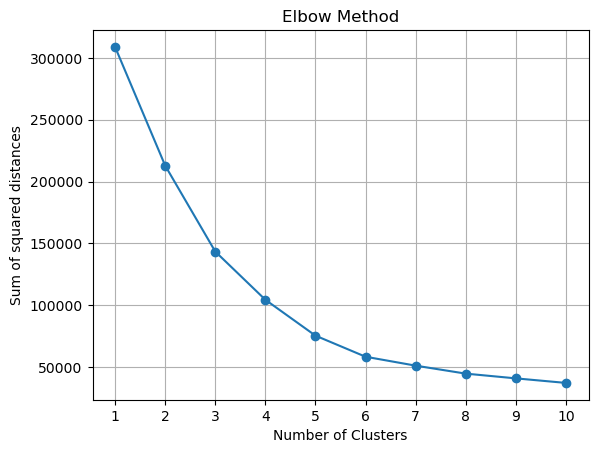

In [3]:
inertias = []
for i in range(1, 11):  # Test 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(train_feat)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 11), inertias, '-o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of squared distances')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

/Users/zhangxijing/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


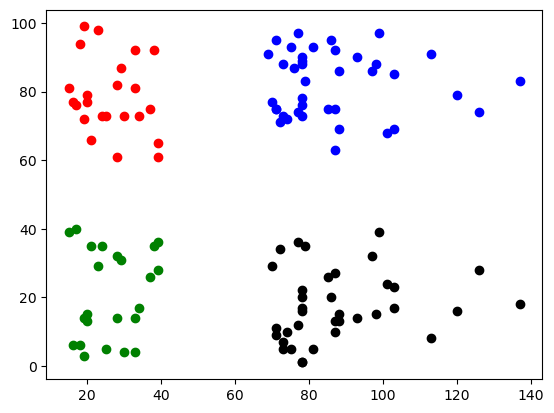

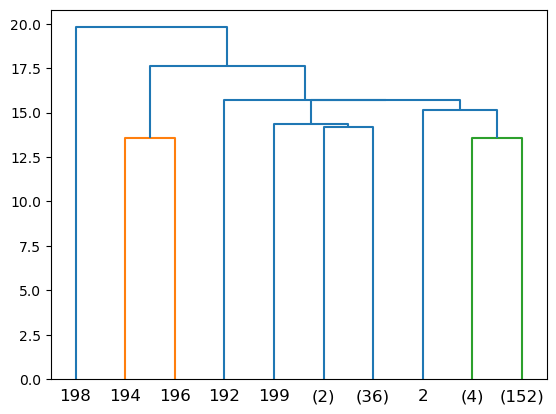

In [4]:
# Visualize the relations between income and spending for all resulting clusters using a scatter plot
#kmeans
model = KMeans(n_clusters=5)
model.fit(train_feat)

# filter rows based on cluster
first_cluster = train_feat.loc[model.labels_ == 0,:]
second_cluster = train_feat.loc[model.labels_ == 1,:]
third_cluster = train_feat.loc[model.labels_ == 2,:]
fourth_cluster = train_feat.loc[model.labels_ == 3,:]
fifth_cluster = train_feat.loc[model.labels_ == 4,:]

# Plotting the results
plt.scatter(first_cluster.loc[:, 'Income'], first_cluster.loc[:, 'Spending'], color='red')
plt.scatter(second_cluster.loc[:, 'Income'], second_cluster.loc[:, 'Spending'], color='black')
plt.scatter(third_cluster.loc[:, 'Income'], third_cluster.loc[:, 'Spending'], color='blue')
plt.scatter(fourth_cluster.loc[:, 'Income'], fourth_cluster.loc[:, 'Spending'], color='green')
# plt.scatter(fifth_cluster.loc[:, 'Income'], fifth_cluster.loc[:, 'Spending'], color='orange')
plt.show()

#kmedoids
# model = KMedoids(n_clusters=6)
# model.fit(train_feat)
# print(kmedoids.labels_)
#

#Agnes
linkage_data = linkage(train_feat, method='single', metric='euclidean')
dendrogram(linkage_data, truncate_mode = 'level' ,p=5)
plt.show()

/Users/zhangxijing/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


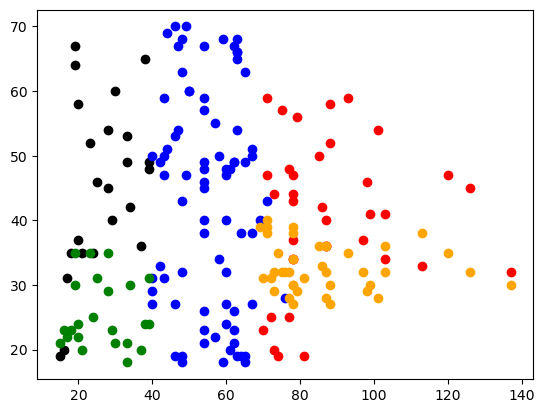

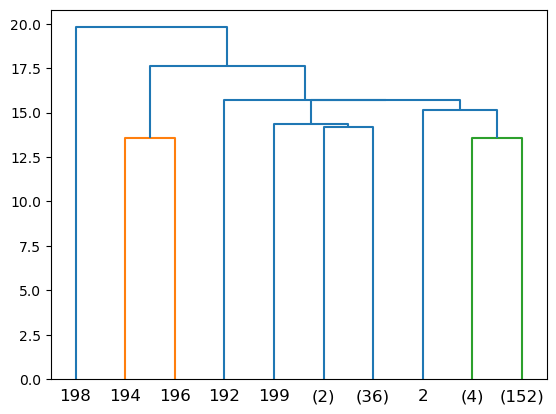

In [6]:
# Visualize the relations between income and age for all resulting clusters using another scatter plot
#kmeans
model = KMeans(n_clusters=5)
model.fit(train_feat)

# filter rows based on cluster
first_cluster = train_feat.loc[model.labels_ == 0,:]
second_cluster = train_feat.loc[model.labels_ == 1,:]
third_cluster = train_feat.loc[model.labels_ == 2,:]
fourth_cluster = train_feat.loc[model.labels_ == 3,:]
fifth_cluster = train_feat.loc[model.labels_ == 4,:]

# Plotting the results
plt.scatter(first_cluster.loc[:, 'Income'], first_cluster.loc[:, 'Age'], color='red')
plt.scatter(second_cluster.loc[:, 'Income'], second_cluster.loc[:, 'Age'], color='black')
plt.scatter(third_cluster.loc[:, 'Income'], third_cluster.loc[:, 'Age'], color='blue')
plt.scatter(fourth_cluster.loc[:, 'Income'], fourth_cluster.loc[:, 'Age'], color='green')
plt.scatter(fifth_cluster.loc[:, 'Income'], fifth_cluster.loc[:, 'Age'], color='orange')
plt.show()

#kmedoids
# model = KMedoids(n_clusters=6)
# model.fit(train_feat)
# print(kmedoids.labels_)
#

#Agnes
linkage_data = linkage(train_feat, method='single', metric='euclidean')
dendrogram(linkage_data, truncate_mode = 'level' ,p=5)
plt.show()

In [11]:
centroids = model.cluster_centers_

# Assuming `Income` and `Spending` are at specific indexes, for example:
age_index = train_feat.columns.get_loc('Age')
income_index = train_feat.columns.get_loc('Income')
spending_index = train_feat.columns.get_loc('Spending')

for i, centroid in enumerate(centroids):
    print(f"Cluster {i+1} Centroid: Age = {centroid[age_index]:.2f}, Income = {centroid[income_index]:.2f}, Spending = {centroid[spending_index]:.2f}")

Cluster 1 Centroid: Age = 40.67, Income = 87.75, Spending = 17.58
Cluster 2 Centroid: Age = 32.69, Income = 86.54, Spending = 82.13
Cluster 3 Centroid: Age = 42.94, Income = 55.09, Spending = 49.71
Cluster 4 Centroid: Age = 25.27, Income = 25.73, Spending = 79.36
Cluster 5 Centroid: Age = 45.22, Income = 26.30, Spending = 20.91


In [4]:
# Try to find names for different clusters based on scatter plots.
# The index may change
# Cluster 1: Young Spenders
# Cluster 2: Wealthy Savers
# Cluster 3: Affluent Professionals
# Cluster 4: Conservative Elders
# Cluster 5: Balanced Middle-Aged

/Users/zhangxijing/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/zhangxijing/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/zhangxijing/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/zhangxijing/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_

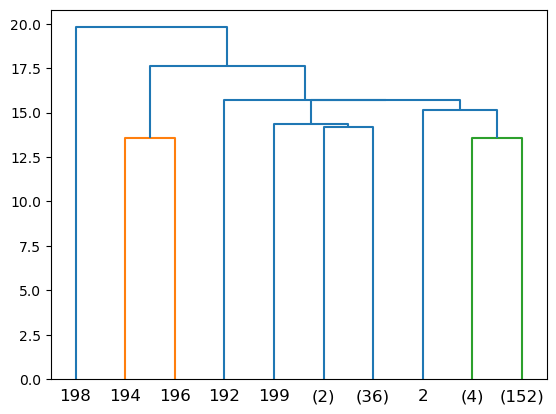

In [3]:
# Input Dateset
org_df = pd.read_csv("/Users/zhangxijing/MasterNEU/INFO6105DataScienceEngineeringMethodsandTools/Dataset/market_ds.csv")
train_feat = prepare_data(org_df)

# Get KMeans
inertias = []
for i in range(1, 11):  # Test 1 to 10 clusters
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(train_feat)
    inertias.append(kmeans.inertia_)

# Kmeans
model = KMeans(n_clusters=2)
model.fit(train_feat)

# Filter rows based on cluster
first_cluster = train_feat.loc[model.labels_ == 0,:]
second_cluster = train_feat.loc[model.labels_ == 1,:]

# Agnes
linkage_data = linkage(train_feat, method='single', metric='euclidean')
dendrogram(linkage_data, truncate_mode = 'level' ,p=5)
plt.show()